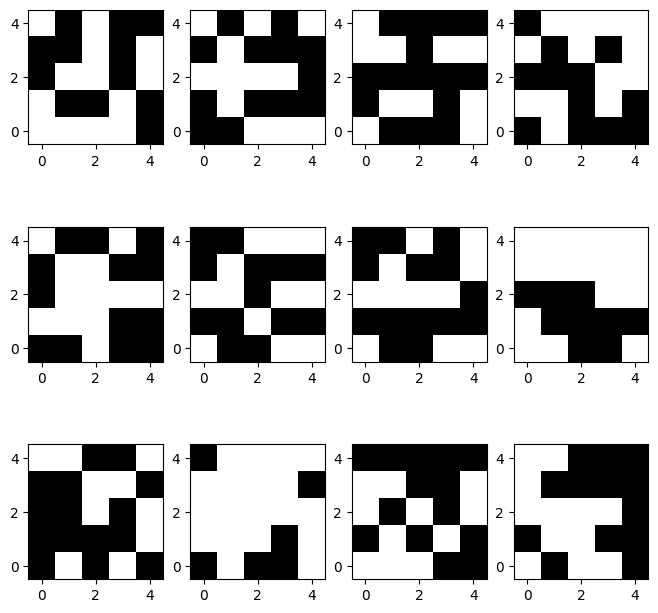

In [103]:
from os import listdir, mkdir
import matplotlib.pyplot as plt
from pathlib import Path

import pandas as pd

random_data_folder = Path("../data/random")
random_data_folder.resolve()


def flatten_read_image(input_image):
    """

    :param input_image: black and white image imported with plt.imread() function
    :return: array of 0's and 1's describing imported image
    """
    prepared_image = []

    for element in input_image:
        element_flatten = []
        for row in element:
            element_flatten.append(row[0])
        prepared_image.append(element_flatten)

    prepared_image.reverse()
    return prepared_image


def import_images(path):
    imported_images = []

    for file in listdir(path):
        img = plt.imread(path.joinpath(file))
        flatten_image = flatten_read_image(img)
        imported_images.append(flatten_image)

    return imported_images


images = import_images(random_data_folder.joinpath("5x5"))
import matplotlib.cm as cm


def show_images(images, color_map):
    plt.figure(figsize=(8, 8))
    columns = 4
    for i, image in enumerate(images):
        plt.subplot(int(len(images) / columns), columns, i + 1)
        plt.imshow(image, interpolation='none', cmap=color_map, origin='lower')
    plt.show()


cmap = cm.gray
show_images(images, cmap)

In [104]:
import neurolab as nl
import numpy as np

In [105]:
train_data01 = images[0]
train_data02 = images[3]

In [106]:
train_data01

[[1.0, 1.0, 1.0, 1.0, 0.0],
 [1.0, 0.0, 0.0, 1.0, 0.0],
 [0.0, 1.0, 1.0, 0.0, 1.0],
 [0.0, 0.0, 1.0, 0.0, 1.0],
 [1.0, 0.0, 1.0, 0.0, 0.0]]

In [107]:
train = pd.DataFrame(train_data02)
train = np.asarray(train)
train = train.flatten()
train[train == 0] = -1

test = pd.DataFrame(train_data01)
test = np.asarray(test)
test = test.flatten()
test[test == 0] = -1

In [108]:
train

array([-1.,  1., -1., -1., -1.,  1.,  1., -1.,  1., -1., -1., -1., -1.,
        1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.],
      dtype=float32)

In [109]:
test

array([ 1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.,
       -1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1., -1.],
      dtype=float32)

In [110]:
net = nl.net.newhop([train])


In [111]:
output = net.sim([test])

In [112]:
output

array([[-1.,  1., -1., -1., -1.,  1.,  1., -1.,  1., -1., -1., -1., -1.,
         1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.]])

In [113]:
comp = (output == train)
comp.all()

True